<a href="https://colab.research.google.com/github/Danya05/Python3/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data = data.replace(' ', np.nan)
data = data.dropna()


In [6]:
columns = ('ClientPeriod MonthlySpending TotalSpent Sex IsSeniorCitizen HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers HasInternetService HasOnlineSecurityService HasOnlineBackup HasDeviceProtection HasTechSupportAccess HasOnlineTV HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod Churn')
data.columns = columns.split()

numeric_indices = np.array([0, 1, 2])
categorical_indices = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [7]:
numeric_data = data[data.columns[numeric_indices]]

categorial_data = data[data.columns[categorical_indices]]
categorial_data.head()

numeric_data

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [8]:
import plotly.express as px

def histogram_draw(df, column):
    fig = px.histogram(df,
                       x=column,
                       marginal="box",
                       template = "plotly_white")
    fig.add_vline(x=np.mean(df[column]),
                  line_dash = 'solid',
                  line_color = 'red')
    fig.update_layout(
        autosize=False,
        width=1000,
        height=400)
    fig.show()

for name in num_cols:
    histogram_draw(numeric_data, name)

TypeError: ignored

([<matplotlib.patches.Wedge at 0x7f7c02639cd0>,
 [Text(-0.009502716761602387, 1.099958953040589, 'Female'),
  Text(0.009502716761602007, -1.099958953040589, 'Male')])

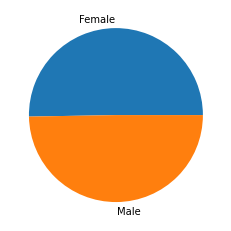

In [9]:
plt.pie(data[cat_cols[0]].value_counts(), labels = list(set(data[cat_cols[0]].values)))


([<matplotlib.patches.Wedge at 0x7f7c0215ea50>,
 [Text(-0.9644673107175672, 0.5289638991058122, '0'),
  Text(0.9644673354801533, -0.5289638539558384, '1')])

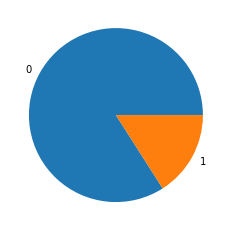

In [10]:
plt.pie(data[cat_cols[1]].value_counts(), labels = list(set(data[cat_cols[1]].values)))

([<matplotlib.patches.Wedge at 0x7f7c026450d0>,
 [Text(-0.0442253338409688, 1.0991106040097398, 'Yes'),
  Text(0.044225333840968176, -1.0991106040097398, 'No')])

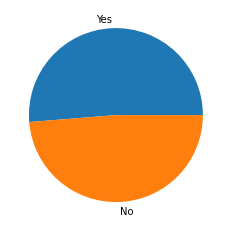

In [11]:
plt.pie(data[cat_cols[2]].value_counts(), labels = list(set(data[cat_cols[2]].values)))

([<matplotlib.patches.Wedge at 0x7f7c04c37750>,
 [Text(-0.6385316157064937, 0.8956993779964654, 'Yes'),
  Text(0.6385316157064936, -0.8956993779964654, 'No')])

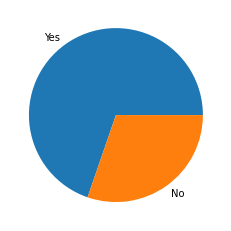

In [12]:
plt.pie(data[cat_cols[3]].value_counts(), labels = list(set(data[cat_cols[3]].values)))

([<matplotlib.patches.Wedge at 0x7f7c040c0d90>,
 [Text(-1.0478303026561053, 0.33474117887647903, 'Yes'),
  Text(1.047830326161651, -0.3347411052977632, 'No')])

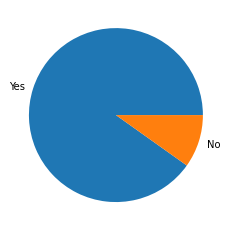

In [13]:
plt.pie(data[cat_cols[4]].value_counts(), labels = list(set(data[cat_cols[4]].values)))

([<matplotlib.patches.Wedge at 0x7f7c020dd310>,
 [Text(0.08413242209941094, 1.0967778879753578, 'Yes'),
  Text(-0.413902931361948, -1.019158654680412, 'No'),
  Text(1.047830326161651, -0.3347411052977632, 'No phone service')])

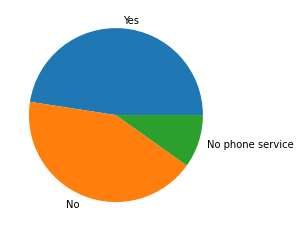

In [14]:
plt.pie(data[cat_cols[5]].value_counts(), labels = list(set(data[cat_cols[5]].values)))

([<matplotlib.patches.Wedge at 0x7f7c020a6f90>,
 [Text(0.19266213209396618, 1.082996446373213, 'No'),
  Text(-0.8289204293206154, -0.7231119704823915, 'DSL'),
  Text(0.8571175196468339, -0.6894559866405248, 'Fiber optic')])

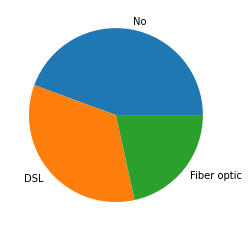

In [15]:
plt.pie(data[cat_cols[6]].value_counts(), labels = list(set(data[cat_cols[6]].values)))

([<matplotlib.patches.Wedge at 0x7f7c0207acd0>,
 [Text(0.016711246390860236, 1.0998730536948635, 'No'),
  Text(-0.7023977849738732, -0.8465443589462969, 'No internet service'),
  Text(0.8571175196468339, -0.6894559866405248, 'Yes')])

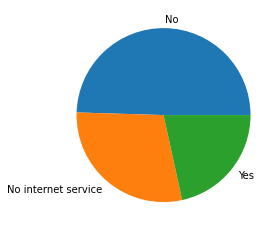

In [16]:
plt.pie(data[cat_cols[7]].value_counts(), labels = list(set(data[cat_cols[7]].values)))

([<matplotlib.patches.Wedge at 0x7f7c02053990>,
 [Text(0.19911110088843784, 1.0818293624703457, 'No'),
  Text(-0.8332139485512096, -0.7181605084796174, 'No internet service'),
  Text(0.8571175196468339, -0.6894559866405248, 'Yes')])

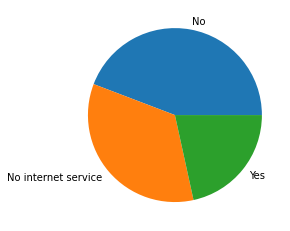

In [17]:
plt.pie(data[cat_cols[8]].value_counts(), labels = list(set(data[cat_cols[8]].values)))

([<matplotlib.patches.Wedge at 0x7f7c01fab690>,
 [Text(0.2087710787492542, 1.0800067762184982, 'No'),
  Text(-0.8395986242433924, -0.7106856901391803, 'No internet service'),
  Text(0.8571175196468339, -0.6894559866405248, 'Yes')])

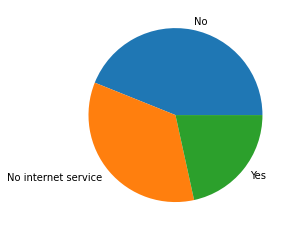

In [18]:
plt.pie(data[cat_cols[9]].value_counts(), labels = list(set(data[cat_cols[9]].values)))

([<matplotlib.patches.Wedge at 0x7f7c01f88510>,
 [Text(0.021953314722279908, 1.0997809108966679, 'Yes'),
  Text(-0.7064246397031493, -0.8431869474916437, 'No internet service'),
  Text(0.8571175196468339, -0.6894559866405248, 'No')])

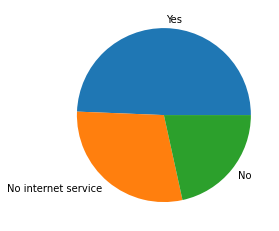

In [19]:
plt.pie(data[cat_cols[10]].value_counts(), labels = list(set(data[cat_cols[10]].values)))

([<matplotlib.patches.Wedge at 0x7f7c01f55150>,
 [Text(0.34689196153734403, 1.0438706658493542, 'No'),
  Text(-0.9245727795514375, -0.5959573603140825, 'No internet service'),
  Text(0.8571175196468339, -0.6894559866405248, 'Yes')])

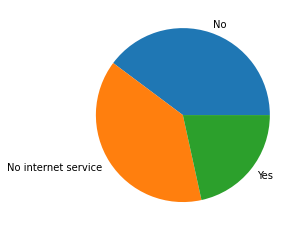

In [20]:
plt.pie(data[cat_cols[11]].value_counts(), labels = list(set(data[cat_cols[11]].values)))

([<matplotlib.patches.Wedge at 0x7f7c01ea1a90>,
 [Text(-0.7467590456276939, 0.8076824424074204, '0'),
  Text(0.7467590456276938, -0.8076824424074206, '1')])

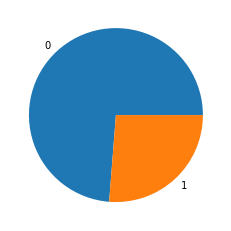

In [21]:
plt.pie(data[target_col].value_counts(), labels = list(set(data[target_col].values)))

Целевая переменная - сбалансированна

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [26]:
dummy_features = pd.get_dummies(cat_cols)

x_arr = np.array(numeric_data['ClientPeriod'])
[numeric_data['ClientPeriod']] = preprocessing.normalize([x_arr])
x_arr = np.array(numeric_data['MonthlySpending'])
[numeric_data['MonthlySpending']] = preprocessing.normalize([x_arr])
x_arr = np.array(numeric_data['TotalSpent'])
[numeric_data['TotalSpent']] = preprocessing.normalize([x_arr])

numeric_data

,ClientPeriod,MonthlySpending,TotalSpent
0,0.018618,0.003749,0.004383
1,0.024373,0.004970,0.007996
2,0.000339,0.014593,0.000324
3,0.010832,0.015247,0.010976
4,0.020311,0.022159,0.028863
...,...,...,...
5277,0.001016,0.005845,0.000351
5278,0.016926,0.008546,0.009346
5279,0.000339,0.010585,0.000235
5280,0.009817,0.014613,0.009461


In [27]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,HasChild,HasContractPhone,HasDeviceProtection,HasInternetService,HasMovieSubscription,HasMultiplePhoneNumbers,HasOnlineBackup,HasOnlineSecurityService,HasOnlineTV,HasPartner,HasPhoneService,HasTechSupportAccess,IsBillingPaperless,IsSeniorCitizen,PaymentMethod,Sex
0,0.018618,0.003749,0.004383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.024373,0.004970,0.007996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000339,0.014593,0.000324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010832,0.015247,0.010976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020311,0.022159,0.028863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.model_selection import train_test_split
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)


In [33]:
def convert_to_float(df):
    df[num_cols] = df[num_cols].replace(' ',-1).astype('float')
    return df

In [36]:
float_transformer = make_pipeline(
    FunctionTransformer(convert_to_float, validate=False)
)

num_cols_pipe = make_pipeline(
    float_transformer,
    FunctionTransformer(lambda x: x.replace([np.inf, -np.inf], np.nan)),
    StandardScaler(),
    SimpleImputer(strategy='median', add_indicator=True)
)
    
cat_cols_pipe = make_pipeline(
    FunctionTransformer(lambda x: x.astype(str)),
    SimpleImputer(strategy='constant'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = ColumnTransformer([
    ('num_cols', num_cols_pipe, num_cols),
    ('cat_cols', cat_cols_pipe, cat_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('LogisticRegression', LogisticRegression(solver='liblinear', random_state=42))
])

parameters = [
    {'LogisticRegression__C': np.logspace(-3, 3, 7),
    'LogisticRegression__max_iter': np.arange(10, 100, 10)
    }
]
features_train = data.drop(target_col, axis=1)
target_train = data[target_col]

In [37]:
clf = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=5)
clf.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_cols',
                                                                         Pipeline(steps=[('pipeline',
                                                                                          Pipeline(steps=[('functiontransformer',
                                                                                                           FunctionTransformer(func=<function convert_to_float at 0x7f7c00dd70e0>))])),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f7c018b8170>)),
                                                                                         ('standardscaler',
                                               

In [38]:
print('Best Params:', clf.best_params_)
print('Best Score: {:.3f}'.format(clf.best_score_))

Best Params: {'LogisticRegression__C': 1000.0, 'LogisticRegression__max_iter': 10}
Best Score: 0.845


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
!pip install catboost
from catboost import CatBoostClassifier

X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 20 kB/s 


In [40]:
boosting_model = CatBoostClassifier(n_estimators=190, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.087345
0:	learn: 0.6629692	total: 66.4ms	remaining: 12.5s
1:	learn: 0.6361418	total: 72.5ms	remaining: 6.81s
2:	learn: 0.6127352	total: 79.5ms	remaining: 4.96s
3:	learn: 0.5921309	total: 90.8ms	remaining: 4.22s
4:	learn: 0.5749777	total: 98.7ms	remaining: 3.65s
5:	learn: 0.5593735	total: 107ms	remaining: 3.28s
6:	learn: 0.5457603	total: 114ms	remaining: 2.98s
7:	learn: 0.5334719	total: 122ms	remaining: 2.78s
8:	learn: 0.5232090	total: 127ms	remaining: 2.56s
9:	learn: 0.5136049	total: 133ms	remaining: 2.39s
10:	learn: 0.5031943	total: 140ms	remaining: 2.27s
11:	learn: 0.4951922	total: 142ms	remaining: 2.1s
12:	learn: 0.4870905	total: 147ms	remaining: 2s
13:	learn: 0.4802426	total: 163ms	remaining: 2.04s
14:	learn: 0.4736536	total: 179ms	remaining: 2.09s
15:	learn: 0.4683289	total: 212ms	remaining: 2.31s
16:	learn: 0.4627726	total: 230ms	remaining: 2.34s
17:	learn: 0.4589317	total: 244ms	remaining: 2.33s
18:	learn: 0.4544778	total: 281ms	remaining: 2.52s
19:	learn:

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.8420759613116301


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [42]:
best_model = pipeline

In [43]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
pipeline.fit(features_train, target_train)
submission['Churn'] = best_model.predict(X_test)# best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.